## Linear Regression Practical Example

What we will do in this example:

- Clean the data
- Relax assumptions
- Log transformation
- Create a model
- Create dummies

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [6]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

#List of second hand cars
#Numerical varibles: Price, Mileage, EngineV, Year
#Categorical variables: Brand, Body, EngineType, Registration, Model
#We would like to predict the price of a used car depending on its specifications

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

#### 1. Explore the descriptive statistics of the variables:

In [7]:
raw_data.describe(include='all')

#Unless we specify 'all' we'll only get descriptives for numerical variables (by default)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Observations: 
- Each variable has a different number of observations which implies there are some missing values
- Unique entries for categorical values:
    - 312 different models: that'd mean more than 312 dummies, thus very difficult to implement in a regression model. We'll drop the variable.
    - Most common category. High frequency of 'Registration' so adds no value

#### 2. Determining variable of interest:

In [9]:
#Pandas method DataFrame.drop(columns, axis)
#returns new object with the indicated columns dropped
#Axis 0 means row, axis 1 means column

data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### 3. Dealing with missing values

In [13]:
data.isnull().sum()

#True stands for missing value while Falls stands for an available one
#True = 1 and False = 0

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [15]:
#Rule of thumbs is that if we're removing <5% of the observations, you are free to just remove all that have missing values.

4345*0.05

217.25

In [16]:
#we're safe to remove rows with missing values
#we'll use the ad-hoc method
data_no_mv = data.dropna(axis=0)

In [17]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### 4. Exploring the Probabiity Distribution Functions
For optimal results, we would be looking for a normal distribution.

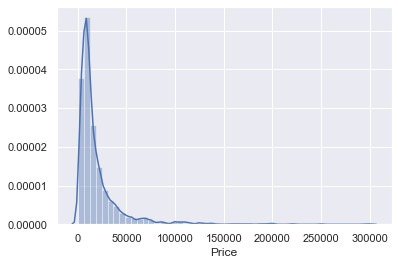

In [19]:
sns.distplot(data_no_mv['Price'])

#For price variable, we observe an exponential distribution
#Looking at the descriptors, we can conclude we have some outliers
#Outliers will affect the regression dramatically and cause coefficients to be inflated

#### 5. Dealing with outliers
Seemesly solution is to remove top 1%of observations (ie. work with the 99 percentile)



In [21]:
#DataFrame.quantile(the quantile) returns the value at the given quantile (=np.percentile)

q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
#note this code is extremely reusable

data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


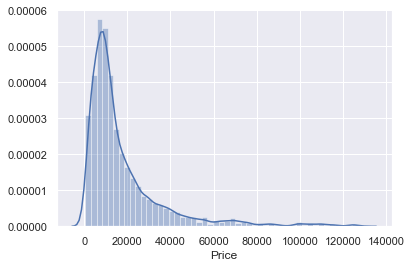

In [23]:
sns.distplot(data_1['Price'])

#data is still distributed in the same way but with less outliers

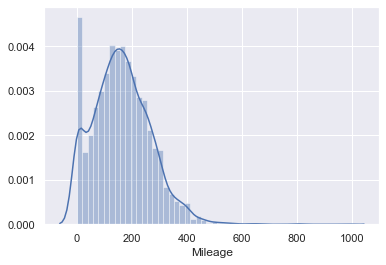

In [24]:
#We have the same problem with Mileage and EngineV
#We apply the same solution

sns.distplot(data_no_mv['Mileage'])

In [26]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

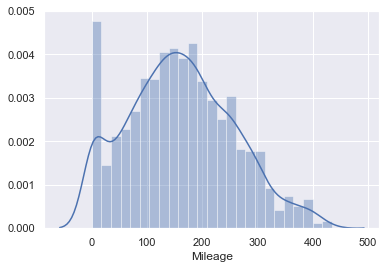

In [27]:
sns.distplot(data_2['Mileage'])

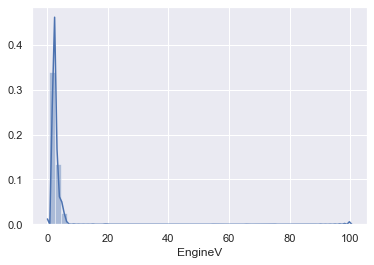

In [32]:
sns.distplot(data_no_mv['EngineV'])

#Research: an interval where engine volume should normally fall is 0.6 and 6.5

In [33]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)

EngV.sort_values(by='EngineV')

#In our sample, we have observations of 70, 90,99...
#A common way to label missing values is by assigning 99.99 from early days computer days. Although it's a bad idea.
#we can conclude these are incorrect entires

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
2214,1.00
1996,1.00
2769,1.00
2508,1.00
2646,1.00


In [34]:
#This time we have a benchmark of 6.5
#Remove all the entries above that value as we know the natural domain of the engine volume values

data_3 = data_2[data_2['EngineV']<6.5]

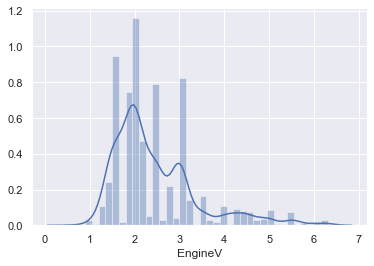

In [35]:
sns.distplot(data_3['EngineV'])

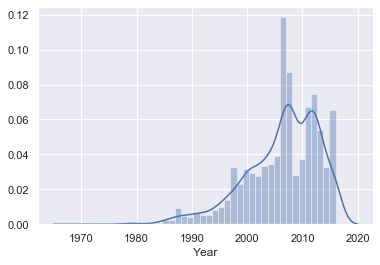

In [37]:
sns.distplot(data_no_mv['Year'])

#the problem with year is in the low end
#we seem to have a few vintage cars

In [38]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

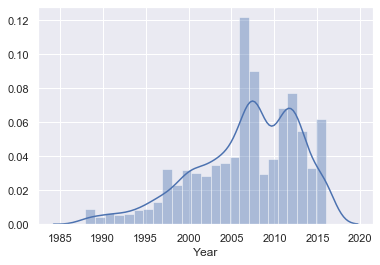

In [40]:
sns.distplot(data_4['Year'])

#### 6. Resetting indexes et voilà!

In [41]:
#currently indices refer to all the data (including those we removed)
#for convenience, we want to reset the indexes
data_cleaned = data_4.reset_index(drop=True)

In [44]:
data_cleaned.describe(include='all')

#Overall we've deleted about 250 observations

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

The continuous variables 'Proce', 'Year', 'EngineV' and 'Mileage' are those that are more likely to be more challenging and cause us more problems.

#### 1. Linearity

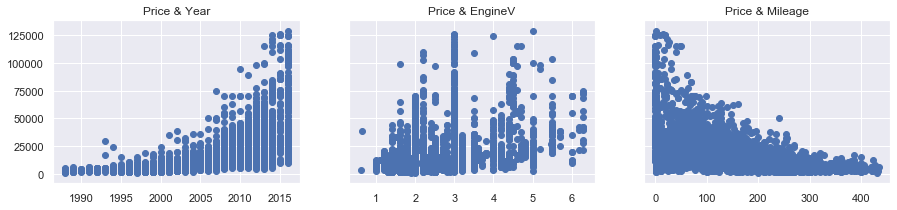

In [45]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price & Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price & Mileage')

plt.show()

#We can spot patterns but definitely not linear ones
#Thus, before we run a linear regression model we need to transform one or more variables

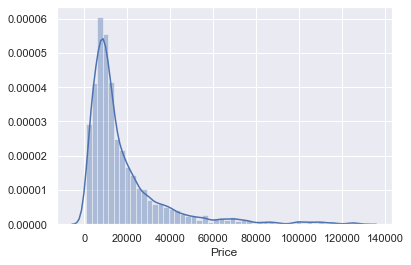

In [48]:
sns.distplot(data_cleaned['Price'])
#Price is not normally dustributed
#Thus the relationship with the other normally distributed variables in non-linear
#rather, patterns looks Exponential.

Relaxing the assumption:

In [49]:
#Log transformations are especially useful when facing exponential relationsips
#Numpy has a method which returns the natural log of a number or array of numbers

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


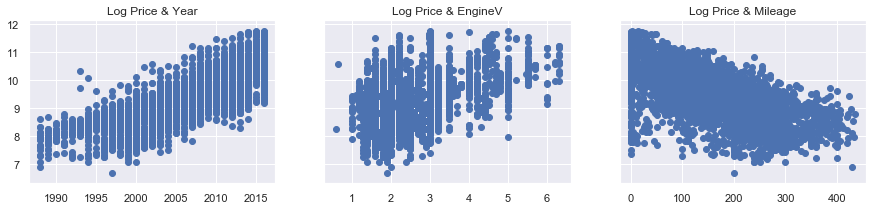

In [50]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price & Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price & EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price & Mileage')

plt.show()
#the lines fit the data so much better.

In [52]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
#The original Price variable is no longer needed. We drop it for convenience

#### 2. No Endogeneity
Recall, no Endogeneity means that the correlation between error and independent variable(s) is zero. Otherwise, hidden variable biad might occur.

*We will discuss the residuals after the regression is created

#### 3. Normality and Homoscedasticity

Error distributed N(0, Population Variance)

1. Normality ✅ we're working witha big sample (CLT)
2. Zero Mean ✅ accomplished thorugh the inclusion of the intercept in the regression
3. Homoscedasticity ✅ generally hold as we can see from the graphs. We already implemented a log transformation (most common fix)

#### 4. No Autocorrelation
a.k.a no serial correlation

We don't need to put too much thought into this one as the observations that we have are not coming from time series data or panel data.


#### 5. Multicollinearity
What most people are wondering is not 'when do we have multicollinearity' as we usually do have some. The better question to ask is **'When can we safely ignore multicollinearity'.**

>Note: sklearn doesn's have a dedicated method to check for multicollinearity. We'll need to turn to statsmodel

In [54]:
data_cleaned.columns.values
# It is logical that 'Year' and 'Mileage' will be correlated

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

One of the best ways to check for multicollinearity is through **VIF (variance inflation factor)**

VIF produces a measure that estimates how much larger the square root of the standard error of an estimate is compared to situation where the variable was completely uncorrelated with the other predictors.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the features we want to check for multicollinearity
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [61]:
vif
#VIF is a range between [1, infinite]
#VIF = 1: no multicollinearity (rarely we'll find perfect data)
#1<VIF<5: perfectly okay
#VIF>5, 6, 10 (no consensus) is unacceptable

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [63]:
#The variable Year is definitely correlated to the other variable
#We will only drop this varible

data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables

Recall, this is how we add categorical variables into a regression.

>If we have N categories for a feature, we have to create N-1 dummies

In [64]:
#pandas has a method, a shortcut, that spots all categorical variables and creates dummies automatically
#We only need one line of code to preprocess all categorical features
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [66]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Homework
1. Check the VIF of the features including the dummies
2. Explore the VIF of a set of features where you have not dropped one of the dummies. (Hint: you'll observe multicollinearity)

#### Rearrange a bit:

In [67]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [68]:
##Reorder columns to have Price first
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [69]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

#### Declare Inputs (x) and Targets (y)

In [70]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

#### Scale the data

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
inputs_scaled = scaler.transform(inputs)

#It is not usually recommended to standardize dummy variables
# However, in ML we don't put too much thought into it
# Scaling has no effect in the predicitive power of dummies, once scaled, though, they lose all their dummy meaning

#### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=305)

#### Create the regression

In [78]:
reg = LinearRegression()
reg.fit(x_train, y_train)

#In fact this is a log-linear regression as the dependent variable is the log of 'Price'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_hat = reg.predict(x_train)

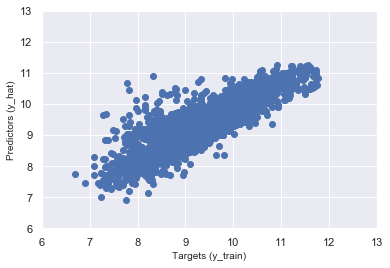

In [84]:
#A simple way to check the final result is t plot the predicted values (y_hat) against the observed values (y_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=10)
plt.ylabel('Predictors (y_hat)', size=10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#Ultimately we can draw a 45 degrees line which shows the best match between targets and predictions

#### Another way to check our resutls: Residuals plot

The residuals are the estimates of the errors

Recall, we look for Normality and Homoscedasticity.

Text(0.5, 1.0, 'Residuals PDF')

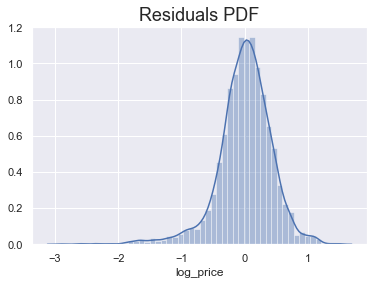

In [85]:
#Residual = difference between the targets and the predictors
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF',size=18)

There are certain observations for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than is observed). The regression is **overestimating the targets.**

No such thing is oberved in the right hand side of the distribution. The model rarely underestimates the targets.

⚠️*(This is food for thought and conserve as a guidence as to how to better our model)*

In [90]:
r2 = reg.score(x_train, y_train)
r2
#Our model is explaining arund 75% of the variability of the data
#This is a relatively good result

0.7538582062864583

#### Finding weights (coefficients) and bias (intercept)

In [107]:
reg.coef_

array([-0.45563055,  0.21216076,  0.02339221,  0.0153525 , -0.13238908,
       -0.18044174, -0.05223451, -0.08597296, -0.14858428, -0.09512014,
       -0.19280754, -0.12219467, -0.15409652, -0.12491173, -0.0298962 ,
       -0.14887411,  0.32153246])

In [92]:
reg.intercept_

9.414321730829224

In [95]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

#This model is far from interpretable:
#the dependent variable is a logarithm, and
#all features are standardized, including the dummies

,Features,Weights
0,Mileage,-0.455631
1,EngineV,0.212161
2,Brand_BMW,0.023392
3,Brand_Mercedes-Benz,0.015353
4,Brand_Mitsubishi,-0.132389
5,Brand_Renault,-0.180442
6,Brand_Toyota,-0.052235
7,Brand_Volkswagen,-0.085973
8,Body_hatch,-0.148584
9,Body_other,-0.095120


In [99]:
data_cleaned['Brand'].unique()

#Remember we dropped one category
#Audi is the benchmark

#Weights interpretation for Dummy variables:
#A positive weith shows that the respective category (Barnd) is more expensive than the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [101]:
data_cleaned['Body'].unique()
#crossover is the benchmark

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [103]:
data_cleaned['Engine Type'].unique()
#Diesel is the benchmark

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [105]:
data_cleaned['Registration'].unique()
#Registration_no is the benchmark

array(['yes', 'no'], dtype=object)

Observations:

- The bigger the weight, the bigger the impact. Mileage is by far the most prominent feture
- It doesn't make sense to compare the continuous variables to the dummies
- Dummies are only compared to their respective benchmark

## Testing

In [108]:
#Finding the predictions
y_hat_test = reg.predict(x_test)

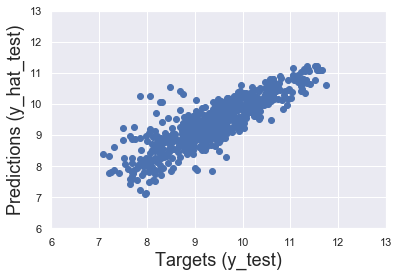

In [109]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#Obervations:
#For higher targets our predictions are closer to the 45-degree line.
#Thus, our odel is very good at predicting higher prices
#For lower ones, the situation is not so amazing. Points are much more scattered

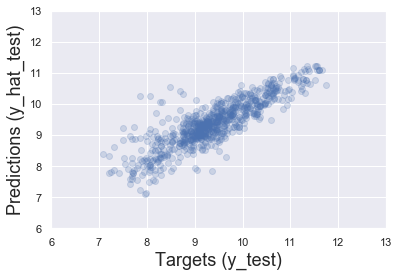

In [110]:
#alpha specifies the opacity of the graph [0,1]
# It creates a heatmap of sorts
#The more saturated the colour, the higher the concentration
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

How good this predictions actually are?

Although unconventional, we can manually explore what the algorith came up with. This will give us more food for thought. :)

In [114]:
#Evaluate the Data Frame performance (test values)
#Keep in mind these were the predictions for the log prices!
#We take the exponentials of the log prices to reach the original prices 
#Numpy method np.exp(x) returns the exponential of x
#the Eurler number 'e' to the power of x

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,21929.071382
1,12935.888321
2,7312.739549
3,7820.266815
4,2507.471725


In [116]:
df_pf['Target'] = np.exp(y_test)
df_pf

#we have lots of missing values and they are quite randomly spreas

,Prediction,Target
0,21929.071382,NaN
1,12935.888321,7900.0
2,7312.739549,NaN
3,7820.266815,NaN
4,2507.471725,NaN
5,6699.512194,14200.0
6,7376.960110,NaN
7,22824.031799,NaN
8,12818.112077,NaN
9,46954.321941,NaN


In [118]:
y_test
#PROBLEM! the original indeces were preserved
#When we added 'y_test' to the df_pf Pandas tried to macth the indices

412     10.305614
1069     9.277999
3431     9.629051
3334     9.011889
1100     9.358760
37       8.948976
2072     8.867850
715      9.457200
744      9.503010
2988    11.326596
650      7.972466
2941     9.190138
2085     9.615805
1510     9.082507
2596     9.296518
3506    10.643041
641      9.648595
3292     8.853665
234      9.517825
148      9.093807
550      9.472705
1296     9.472705
1591     9.350102
1428     9.249561
153      8.779557
426     10.263258
3296     9.341369
494     10.148588
1295     7.740664
3358     8.853665
          ...    
925     10.021271
115      9.803667
3365    11.225243
2832     9.769956
375     10.609057
1457     9.389323
2684    10.584056
2949     7.495542
3077     9.472705
408      7.803843
2621     9.350015
2182     9.350102
2853     9.093807
266      9.841612
675      9.602382
1727    10.199882
1221     9.961756
898      8.536996
1618    10.077441
1995     8.516993
3713     9.769956
281      9.539644
1559     9.210340
1167     9.441452
1346     8

In [119]:
#We need to reset the indexes of y_test by rewriting the variables
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.305614
1     9.277999
2     9.629051
3     9.011889
4     9.358760
Name: log_price, dtype: float64

In [120]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,21929.071382,29900.0
1,12935.888321,10700.0
2,7312.739549,15200.0
3,7820.266815,8200.0
4,2507.471725,11600.0
5,6699.512194,7700.0
6,7376.960110,7100.0
7,22824.031799,12800.0
8,12818.112077,13400.0
9,46954.321941,83000.0


In [122]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

#Examining the residuals is the same as examining the heart of the algorithm
# OLS >> min SSE (lower error, better explanatory power)

In [124]:
#We take absolute % value
#whether an observation is off by +1% or -1% is mostly irrelevant
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,21929.071382,29900.0,7970.928618,26.658624
1,12935.888321,10700.0,-2235.888321,20.896153
2,7312.739549,15200.0,7887.260451,51.889871
3,7820.266815,8200.0,379.733185,4.630892
4,2507.471725,11600.0,9092.528275,78.383864
5,6699.512194,7700.0,1000.487806,12.993348
6,7376.960110,7100.0,-276.960110,3.900847
7,22824.031799,12800.0,-10024.031799,78.312748
8,12818.112077,13400.0,581.887923,4.342447
9,46954.321941,83000.0,36045.678059,43.428528


In [125]:
df_pf.describe()
#Looking at percentiles: for most our predictions we got relatively close

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15720.456883,17809.214147,2088.757264,38.396490
std,12919.155377,19016.280124,9666.601945,71.413847
min,1205.273166,1200.000000,-33523.350172,0.004955
25%,7654.545653,7211.250000,-2065.945878,10.823713
50%,11599.937315,11250.000000,136.899789,23.659268
75%,19612.169766,20500.000000,3797.708756,41.716833
max,75437.627631,125000.000000,84568.886825,976.378195


In [128]:
#by default Pandas won't show us all the rows
#We can change the settions to make it more view-friendly

pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f'%x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
271,7999.40,7999.00,-0.40,0.00
151,42512.59,42500.00,-12.59,0.03
587,26887.32,26900.00,12.68,0.05
554,11513.61,11500.00,-13.61,0.12
601,36452.89,36500.00,47.11,0.13
468,10870.76,10900.00,29.24,0.27
180,9073.97,9100.00,26.03,0.29
355,16855.31,16800.00,-55.31,0.33
39,6523.21,6500.00,-23.21,0.36
614,9758.99,9800.00,41.01,0.42


Observations:
- Bottom of te table: We have only very few predictions that are dramatically far off from the predicted value
- On average our model is pretty decent at predicting the price
- Not so good for oberved prices (targets) that are extremely low
- In such cases, the residuals are negative. Thus, their predictions are higher than the targets.
- One possible explanation is that we **might be missing an important factor that drives the price of the cars lower**
- It may be the model of the car, which we removed that variable at the start (too many different models), or it may be that the car was damaged in some way, which we did not have in the first place

## How to improve our model?

Our model isn't outstanding. However, it can take months, or even years, to create a truly great model in some cases.

Generally, 
1. Use a different set of variabes
2. Remove a bigger part of the outliers
3. Use different kinds of transformations

> ML requires us to revisit the model many times before we are truly happy with the result.

#### Homework:

Take the model we created as a basis and try to improve it.

**One of the biggest changes will be observed when you include the 'Model' feature we dropped in the beginning.**

Here are some other suggestions:

- Perform feature selection

- Create a regression where 'Price' is not transformed

- Deal with the outliers in a different way
